Boxplots
1. Objetivos:
- Aprender a graficar e interpretar boxplots utilizando Seaborn
- Aprender a lidiar con valores atípicos usando IQR-Score
2. Desarrollo:
Los boxplots son una manera de visualizar la distribución de nuestros datos usando percentiles. Vamos a utilizar una librería de visualización de datos llamada Seaborn que hace muy sencilla la creación de boxplots.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('./dataset/melbourne_housing-clean.csv', index_col=0)

In [4]:
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


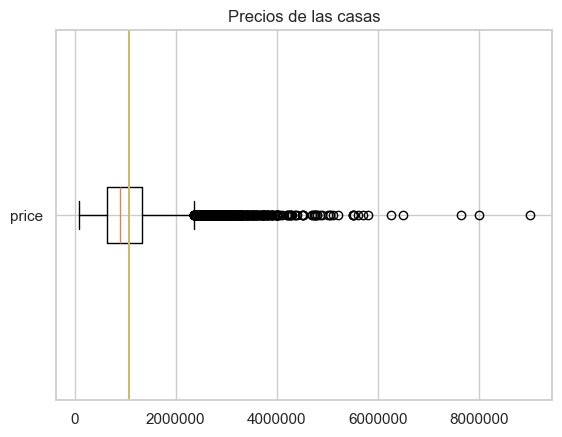

In [27]:
# Configurar el eje y para evitar notación científica
plt.ticklabel_format(style='plain', axis='x')
plt.boxplot(df['price'],labels=['price'], vert=False )
plt.axvline(df['price'].mean(), c='y')
plt.title('Precios de las casas')
plt.show()

<Axes: xlabel='price'>

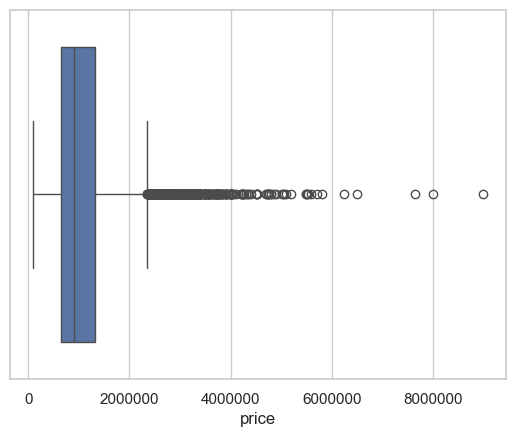

In [26]:
sns.set(style="whitegrid")
# Configurar el eje y para evitar notación científica
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['price'])

¿Qué significa todo esto?

- La caja está delimitada por 2 valores: El percentil 25 y el percentil 75.
- La línea vertical dentro de la caja indica el percentil 50 (o sea, la mediana).
- Los "bigotes" intentan abarcar el resto de los datos a la izquierda y derecha de la caja, PERO no se extienden más allá de una distancia equivalente a 1.5 * Rango Intercuartílico. Como bien recordarás, el rango intercuartílico es la diferencia entre el percentil 75 y el percentil 25. Si multiplicamos 1.5 por ese Rango Intercuartílico obtenemos el tamaño máximo de los bigotes.
- Los puntos individuales que están fuera de los bigotes son, obviamente, las muestras cuyo valor excede el tamaño máximo de los bigotes. No podemos tomar esto como una "Regla Absoluta", pero en general se considera que estos valores son los valores atípicos de nuestro conjunto.

Como puedes ver, esta gráfica nos da muchísima información muy útil.

- Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2 000 000 y que los precios muy altos son anomalías en nuestro conjunto.
- Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
- También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Vamos a ver qué pasa si graficamos una línea vertical justo donde está el promedio de nuestros datos. Para esto vamos a usar matplotlib, otra librería de visualizaciones de datos que aprenderemos a detalle más adelante:

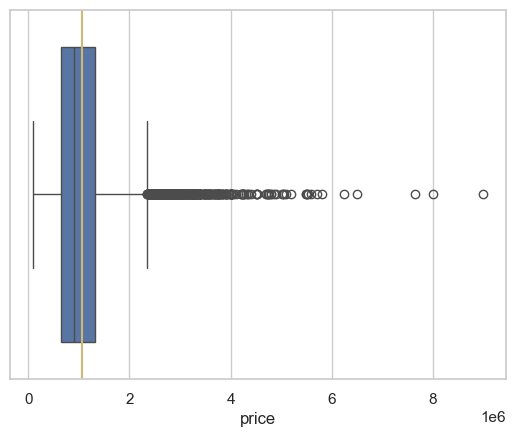

In [28]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])
plt.axvline(df['price'].mean(), c='y')

Como puedes ver, a pesar de los valores atípicos tan extremos, tenemos tantos valores en el rango menor de nuestros datos que el promedio queda bastante cercano a la mediana.

Los valores atípicos pueden significar múltiples cosas:

- A veces son errores de medición
- A veces son errores humanos de transcripción
- Podrían ser simplemente anomalías naturales causadas por fenómenos aleatorios
- O podrían tener un significado más profundo: por ejemplo, la riqueza de alguien como Carlos Slim es una anomalía en este país, pero que es un indicador de desigualdad muy fuerte que nos da información útil acerca de la distribución de la riqueza

Decidir cómo lidiar con estos valores atípicos (si eliminarlos o dejarlos) depende totalmente del contexto.

Dado que nuestro análisis de este conjunto aún no es muy profundo, por el momento vamos a asumir la posición de eliminar estos datos, solamente para ver cómo se haría este proceso.

## Rango Intercuartílico y valores atípicos

Podemos utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite. A esta medida se le suele llamar el Score de Rango Intercuartílico (IQR-Score). De esa manera estamos filtrando los valores atípicos (al menos lo que se considera valores atípicos bajo este esquema).

In [93]:
def obtener_outliers(data_column):

    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)

    iqr = q3 - q1

    superior = q3 + (1.5 * iqr)
    inferior = q1 - (1.5 * iqr)

    return df[(data_column < inferior) | (data_column > superior)]



In [113]:
def calcular_iqr_score(data_column):
    iqr = data_column.quantile(0.75) - data_column.quantile(0.25)
    filtro_inferior = data_column > data_column.quantile(0.25) - (iqr * 1.5)
    filtro_superior = data_column < data_column.quantile(0.75) + (iqr * 1.5)

    return df[ filtro_superior & filtro_inferior]


In [105]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
superior = q3 + (1.5 * iqr)
inferior = q1 - (1.5 * iqr)

In [94]:

outliers = obtener_outliers(df['price'])

In [109]:
superior

2352500.0

In [107]:
df[df['price']>superior]

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,3.0,2.0,0.0,211.0,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280.0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,3206.0,3.0,2.0,1.0,177.0,Port Phillip,-37.84150,144.95850,Southern Metropolitan,3280.0
97,Albert Park,70 Barrett St,3,h,2575000.0,S,Greg,15/10/2016,3.3,3206.0,3.0,2.0,1.0,228.0,Port Phillip,-37.84450,144.95010,Southern Metropolitan,3280.0
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,18/03/2017,3.3,3206.0,3.0,2.0,0.0,147.0,Port Phillip,-37.84730,144.95510,Southern Metropolitan,3280.0
103,Albert Park,55 Withers St,4,h,2800000.0,VB,Cayzer,18/06/2016,3.3,3206.0,4.0,3.0,1.0,327.0,Port Phillip,-37.84670,144.94750,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11376,Fitzroy,201 Gore St,6,h,2590000.0,S,Nelson,22/07/2017,2.1,3065.0,5.0,3.0,2.0,1975.0,Manningham,-37.78109,145.13745,Northern Metropolitan,5825.0
11487,Balwyn,27 Burroughs Rd,5,h,3812000.0,S,VICProp,29/07/2017,7.9,3103.0,3.0,2.0,1.0,2015.0,Whittlesea,-37.60983,145.03874,Southern Metropolitan,5682.0
11593,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,2.0,1.0,0.0,2003.0,Melbourne,-37.80802,144.96168,South-Eastern Metropolitan,7113.0
11605,Port Melbourne,178 Princes St,3,h,2730000.0,S,Chisholm,29/07/2017,3.5,3207.0,3.0,1.0,1.0,1960.0,Melbourne,-37.79773,144.94611,Southern Metropolitan,8648.0


In [108]:
len(outliers)

519

In [114]:
df_filtrado = calcular_iqr_score(df['price'])

In [116]:
df_filtrado[df_filtrado['price']>superior]

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count


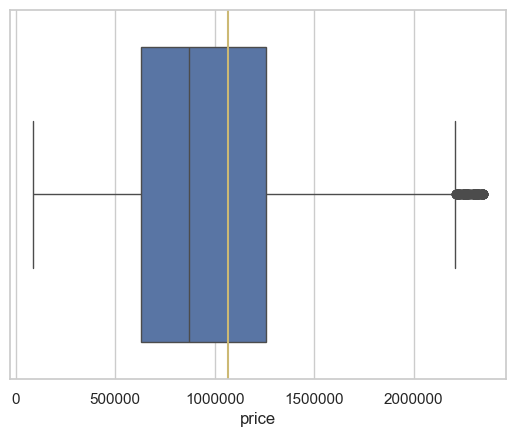

In [119]:
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x = df_filtrado['price'])
plt.axvline(df['price'].mean(), c='y')

In [121]:
q1

640000.0

In [123]:
df_filtrado['price'].quantile(.50)

870000.0

In [124]:
q3

1325000.0

In [125]:
superior

2352500.0

Como ves, el algoritmo de Seaborn debe de ser ligeramente distinto al nuestro, pero el resultado fue prácticamente lo que queríamos. Ahora tenemos un conjunto de datos sin valores atípicos.

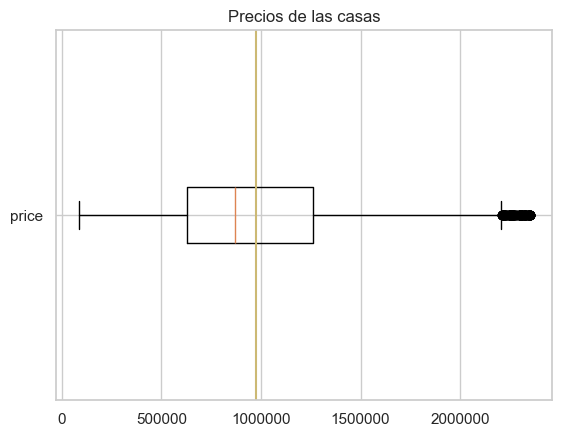

In [120]:
# Configurar el eje y para evitar notación científica
plt.ticklabel_format(style='plain', axis='x')
plt.boxplot(df_filtrado['price'],labels=['price'], vert=False )
plt.axvline(df_filtrado['price'].mean(), c='y')
plt.title('Precios de las casas')
plt.show()